In [1]:
from mmcv import collect_env
collect_env()

# Check MMRotate installation
import mmrotate
print(mmrotate.__version__)

# Check MMDetection installation
import mmdet
print(mmdet.__version__)

# Check mmcv installation
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

Configured with: --prefix=/Library/Developer/CommandLineTools/usr --with-gxx-include-dir=/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include/c++/4.2.1


0.3.2
2.25.1
not available
clang 12.0.5


In [6]:
# # Install MMCV and MMDetection using MIM.
# !pip3 install -U openmim
# !mim install mmcv-full
# !mim install mmdet

# Install MMRotate from the source.
# !git clone https://github.com/open-mmlab/mmrotate.git
# %cd .mmrotate
# !pip install -e .

/Users/bytedance/mmrotate
Obtaining file:///Users/bytedance/mmrotate
  Preparing metadata (setup.py) ... done
  Attempting uninstall: mmrotate
    Found existing installation: mmrotate 0.3.2
    Uninstalling mmrotate-0.3.2:
      Successfully uninstalled mmrotate-0.3.2
  Running setup.py develop for mmrotate


In [11]:
# !pip3 install mmengine

In [9]:
# We use mim to download the pre-trained checkpoints for inference and finetuning.
# !mim download mmrotate --config oriented_rcnn_r50_fpn_1x_dota_le90 --dest .

In [2]:
import torch

In [3]:
import mmcv
from mmcv.runner import load_checkpoint

from mmdet.apis import inference_detector, show_result_pyplot
from mmrotate.models import build_detector

# Choose to use a config and initialize the detector
config = 'oriented_rcnn_r50_fpn_1x_dota_le90.py'
# Setup a checkpoint file to load
checkpoint = 'oriented_rcnn_r50_fpn_1x_dota_le90-6d2b2ce0.pth'

# Set the device to be used for evaluation
# device='cuda:0'

# Load the config
config = mmcv.Config.fromfile(config)
# Set pretrained to be None since we do not need pretrained model here
config.model.pretrained = None

# Initialize the detector
model = build_detector(config.model)

# Load checkpoint
checkpoint = load_checkpoint(model, checkpoint, map_location=torch.device('cpu') )

# Set the classes of models for inference
model.CLASSES = checkpoint['meta']['CLASSES']

# We need to set the model's cfg for inference
model.cfg = config

# Convert the model to GPU
# model.to('')
# Convert the model into evaluation mode
model.eval()

/Users/bytedance/miniconda3/envs/open-mmlab/lib/python3.7/site-packages/mmdet/models/dense_heads/anchor_head.py:116: UserWarning: DeprecationWarning: `num_anchors` is deprecated, for consistency or also use `num_base_priors` instead
  warnings.warn('DeprecationWarning: `num_anchors` is deprecated, '


load checkpoint from local path: oriented_rcnn_r50_fpn_1x_dota_le90-6d2b2ce0.pth


OrientedRCNN(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
      

In [6]:
# Use the detector to do inference
img = 'demo.jpg'
result = inference_detector(model, img)

/Users/bytedance/miniconda3/envs/open-mmlab/lib/python3.7/site-packages/mmdet/models/dense_heads/anchor_head.py:123: UserWarning: DeprecationWarning: anchor_generator is deprecated, please use "prior_generator" instead
  warnings.warn('DeprecationWarning: anchor_generator is deprecated, '


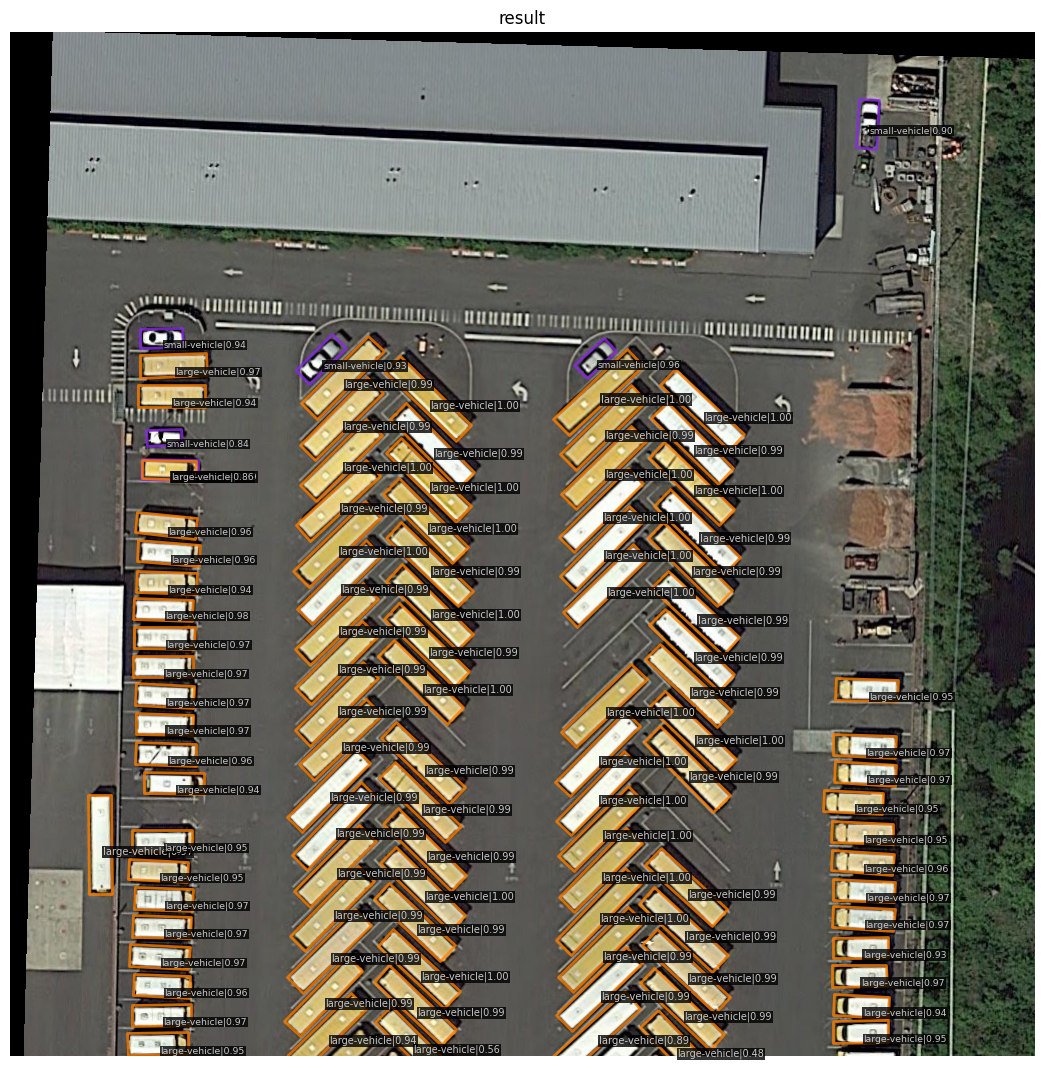

In [7]:
# Let's plot the result
show_result_pyplot(model, img, result, score_thr=0.3, palette='dota')

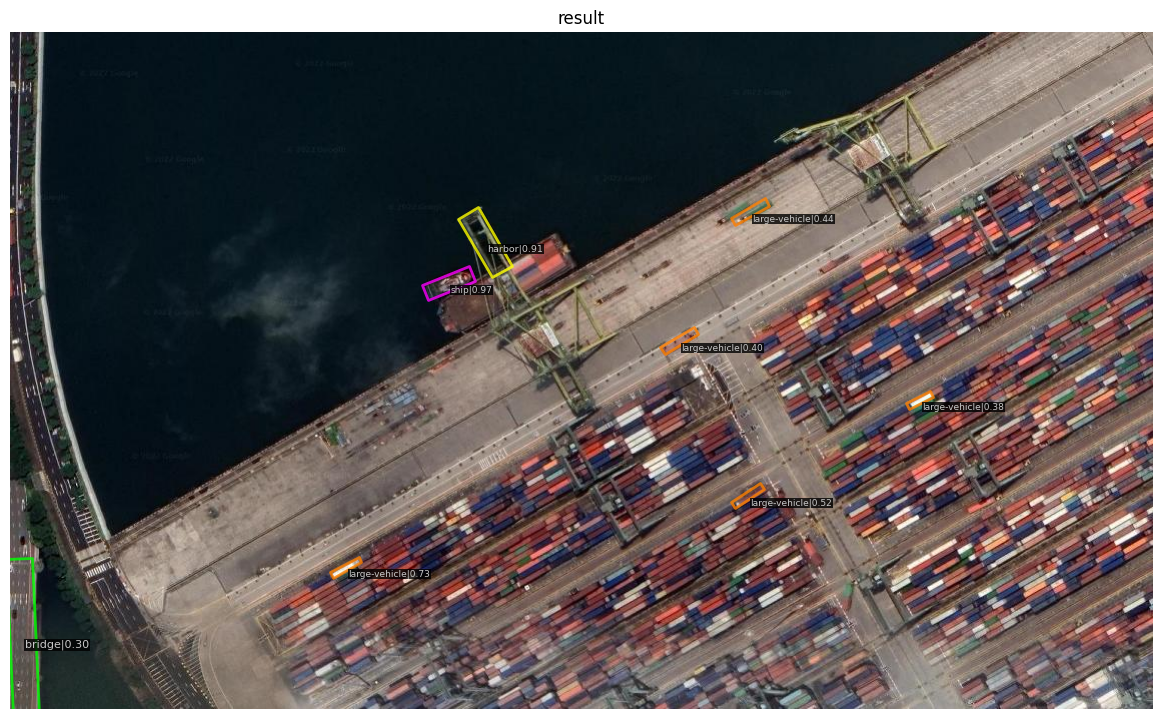

In [8]:
from mmrotate.apis import inference_detector_by_patches
img = '/Users/bytedance/Downloads/220711-Crane_Dataset_IEEEDataPort/gsat_crane_5_modified.jpg'
result = inference_detector_by_patches(model, img, [1024], [824], [1.0], 0.1)

show_result_pyplot(model, img, result, score_thr=0.3, palette='dota')

# Train a new model

In [9]:
# download, decompress the data
!wget https://download.openmmlab.com/mmrotate/data/ssdd_tiny.zip
!unzip ssdd_tiny.zip > /dev/null

zsh:1: command not found: wget
unzip:  cannot find or open ssdd_tiny.zip, ssdd_tiny.zip.zip or ssdd_tiny.zip.ZIP.


In [1]:
import pandas as pd
import os
import json

head="""
imagesource:GoogleEarth
gsd:0.255589285596
"""

container_files=os.listdir('/Users/bytedance/Documents/GitHub/mmrotate/dataset/220719 Container dataset for IEEE Dataport',)
cc_files=os.listdir('/Users/bytedance/Documents/GitHub/mmrotate/dataset/220711-Crane_Dataset_IEEEDataPort')



In [3]:

f = open ('/Users/bytedance/Documents/GitHub/mmrotate/dataset/220711-Crane_Dataset_IEEEDataPort/gsat_crane_1_modified.json', "r")
txt = json.loads(f.read())
# df=pd.read_json('/Users/bytedance/Documents/GitHub/mmrotate/dataset/220711-Crane_Dataset_IEEEDataPort/gsat_crane_1_modified.json',orient='index')
# print(txt)

for x,y in enumerate(txt['shapes'][:1]):

    label=y['label']
    # points=' '.join(y['points'])
    string=""
    for i in y['points']:
        # print(i)
        print("iiiii")
        print(type(i))
        string=string+ " "+" ".join( [str(j) for j in i])
    # print(label)
    # print(y['points'])
    # print(type(y['points']))
    print(string + " " + label + " " +"0")
    # print(x,json.loads(y))

iiiii
<class 'list'>
iiiii
<class 'list'>
iiiii
<class 'list'>
iiiii
<class 'list'>
iiiii
<class 'list'>
iiiii
<class 'list'>
iiiii
<class 'list'>
iiiii
<class 'list'>
iiiii
<class 'list'>
iiiii
<class 'list'>
iiiii
<class 'list'>
iiiii
<class 'list'>
iiiii
<class 'list'>
iiiii
<class 'list'>
iiiii
<class 'list'>
iiiii
<class 'list'>
iiiii
<class 'list'>
iiiii
<class 'list'>
 385.0503597122302 176.76978417266184 410.94964028776974 158.78417266187049 484.3309352517985 81.80575539568345 491.5251798561151 88.28057553956833 527.4964028776978 56.62589928057554 541.8848920863309 71.01438848920863 524.6187050359712 89.71942446043164 549.0791366906475 113.46043165467624 503.03597122302153 155.1870503597122 505.91366906474815 160.94244604316546 492.96402877697835 172.45323741007192 478.5755395683453 175.33093525179854 449.79856115107907 196.91366906474818 420.3021582733813 199.07194244604315 322.46043165467626 305.54676258992805 305.1942446043165 289.71942446043164 349.7985611510791 240.7985611

In [46]:
txt['shapes'][0]['points']

[[385.0503597122302, 176.76978417266184],
 [410.94964028776974, 158.78417266187049],
 [484.3309352517985, 81.80575539568345],
 [491.5251798561151, 88.28057553956833],
 [527.4964028776978, 56.62589928057554],
 [541.8848920863309, 71.01438848920863],
 [524.6187050359712, 89.71942446043164],
 [549.0791366906475, 113.46043165467624],
 [503.03597122302153, 155.1870503597122],
 [505.91366906474815, 160.94244604316546],
 [492.96402877697835, 172.45323741007192],
 [478.5755395683453, 175.33093525179854],
 [449.79856115107907, 196.91366906474818],
 [420.3021582733813, 199.07194244604315],
 [322.46043165467626, 305.54676258992805],
 [305.1942446043165, 289.71942446043164],
 [349.7985611510791, 240.79856115107913],
 [392.9640287769784, 183.9640287769784]]

In [54]:
a='b'

In [55]:
a=[1,2]

In [70]:
[str(j) for j in a]

TypeError: 'str' object is not callable

In [19]:
import glob
files = glob.glob('/Users/bytedance/Documents/GitHub/mmrotate/dataset/220719 Container dataset for IEEE Dataport/*.json', recursive=True)

In [10]:
print(files[1])

/Users/bytedance/Documents/GitHub/mmrotate/dataset/220719 Container dataset for IEEE Dataport/Screenshot_14.json


In [18]:
os.getcwdb().decode()

'/Users/bytedance/Documents/GitHub/mmrotate/demo'